In [1]:
import uproot
from matplotlib import pyplot as plt
import numpy as np

In [2]:
f = 'HToSSTobbbb_ZToLL_MH-125_MS-40_ctauS-100.root'

data = uproot.open(f) 

In [3]:
tree = data['Events']

In [20]:
for k in tree.keys():
    if 'PV' in k:
        print(k)

IsoTrack_fromPV
Jet_chFPV0EF
nOtherPV
OtherPV_z
PV_ndof
PV_x
PV_y
PV_z
PV_chi2
PV_score
PV_npvs
PV_npvsGood
HLT_Diphoton30PV_18PV_R9Id_AND_IsoCaloId_AND_HE_R9Id_DoublePixelVeto_Mass55


In [5]:
branches = tree.arrays()

In [6]:
def flatten(l):

    l_flat = np.array([xx for x in l for xx in x])

    return l_flat

In [7]:
dxy = branches["SV_dxy"]
dxyErr = branches["SV_dxySig"]
dxyFlat = flatten(dxy)
dxyErrFlat = flatten(dxyErr)
# SV_x = flatten(branches['SV_x'])
# SV_y = flatten(branches['SV_y'])
# SV_phi = flatten(branches['SV_phi'])

In [8]:
max(dxyFlat),max(dxyFlat/dxyErrFlat)

(np.float32(40.46875), np.float32(3.9481707))

In [9]:
dxyUnc = dxyFlat/dxyErrFlat

In [10]:
print(len(dxyErrFlat))

21648


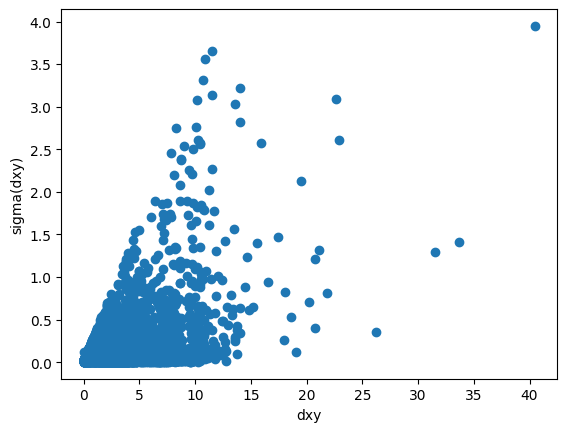

In [11]:
plt.scatter(dxyFlat,dxyUnc)
plt.xlabel('dxy')
plt.ylabel('sigma(dxy)')
plt.show()

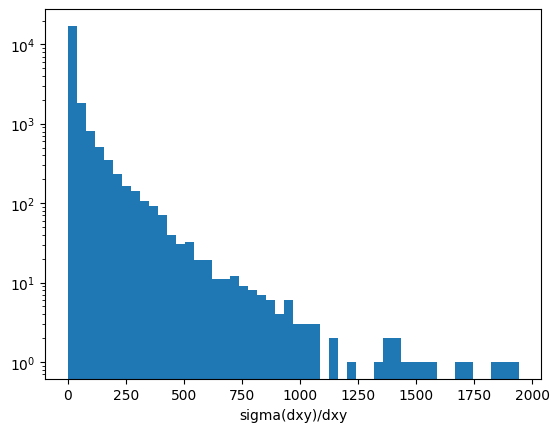

In [21]:
plt.hist(dxyFlat/dxyUnc,bins=50)
plt.xlabel('sigma(dxy)/dxy')
plt.yscale('log')
plt.show()

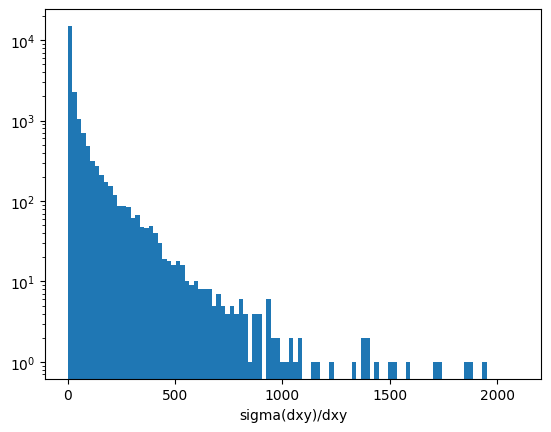

In [13]:
plt.hist(dxyErrFlat,bins=np.linspace(0.,2100.,101))
plt.xlabel('sigma(dxy)/dxy')
plt.yscale('log')
plt.show()

### Compute IP2D

In [14]:
ip2d = []
for i,ev in enumerate(dxy):
    ipList = []
    if len(ev) == 0:
        continue     
    for j,d0 in enumerate(ev):
        # d0Err = d0/dxyErr[i][j]
        ipT = np.log10(dxyErr[i][j])
        ipList.append(ipT)
    
    ip2d.append(np.median(ipList))

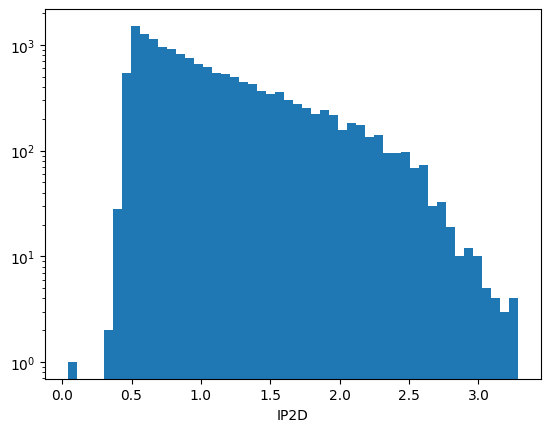

In [15]:
plt.hist(ip2d,bins=50)
plt.xlabel('IP2D')
plt.yscale('log')
plt.show()

In [16]:
it = uproot.iterate({f : 'Events'},branches=['SV_dxy','SV_dxySig'],treepath='Events')

In [17]:
for ev in it:
    print(ev)
    break

[{run: 1, luminosityBlock: 3, event: 1331, HTXS_Higgs_pt: 185, ...}, ..., {...}]
